####  <span style="color:red">Added changes</span> in next 3 cells

## Fake vs Real News

### Import libraries

In [1]:
import pandas as pd # data processing 

# Removed
# import os # access to dir structure

import matplotlib.pyplot as plt # plotting 
import numpy as np # linear algebra 
import seaborn as sns 

# Added
# tool to read data csv file (it is faster than pandas and can read files from .zip)
import datatable as dt

# Removed
# # display and store Matplotlib plots
# %matplotlib inline

# import kaggle

# colored output text
from termcolor import colored

import re
import string 

# added
from bs4 import BeautifulSoup

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

# Added
# Silent warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Dataset in use 
### https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

####  <span style="color:red">Added changes</span> in next 3 cells

In [2]:
# # view files in downloaded dataset folder 

# csv_files = os.listdir(r"/Users/Taurai/Iza/CFG/Data Science : Part 2/Project Folder /archive(3)")
# for file in csv_files: 
#     print(file)
# print(csv_files.count)

In [3]:
# fake_df1 = pd.read_csv("./archive(3)/Fake.csv")
# real_df1 = pd.read_csv("./archive(3)/True.csv")

In [4]:
fake_df1 = dt.fread('data/fake-and-real-news-dataset.zip/Fake.csv').to_pandas()
real_df1 = dt.fread('data/fake-and-real-news-dataset.zip/True.csv').to_pandas()

### Quick exploratory analysis of Fake News DF

In [5]:
fake_df1.head(6)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While ...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"


In [6]:
fake_df1.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17453,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,630,9050,46


In [7]:
fake_df1.shape

(23481, 4)

In [8]:
fake_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
fake_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's find and remove duplicates in Fake DF

In [10]:
duplicate = fake_df1['text'][fake_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicate in {fake_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))


Found 6028 duplicate in 23481 samples


####  <span style="color:red">Added changes</span> in next cell

In [11]:
# remove duplicates 

fake_df1.drop(index=duplicate, inplace=True)

# Added
fake_df1.shape

# Removed
# print(fake_df1.shape, '\n')
# fake_df1.sample()

(17453, 4)

In [12]:
fake_df1['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News'],
      dtype=object)

### Quick explanatory analysis of Real News DF

In [13]:
real_df1.head(6)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"


In [14]:
real_df1.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20825,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [15]:
real_df1.shape

(21417, 4)

In [16]:
real_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [17]:
real_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's Find and remove duplicates in Real DF

In [18]:
duplicate = real_df1['text'][real_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicate in {real_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))

Found 225 duplicate in 21417 samples


####  <span style="color:red">Added changes</span> in next cell

In [19]:
real_df1.drop(index=duplicate, inplace=True)

# Added
real_df1.shape

# Removed
# print(real_df1.shape, '\n')
# real_df1.sample()

(21192, 4)

In [20]:
real_df1['subject'].value_counts()

politicsNews    11214
worldnews        9978
Name: subject, dtype: int64

### Let's add 'true' label for easier reference where Fake = 0, Real = 1

In [21]:
# label the diff df for easier ref

fake_df1['true'] = 0
real_df1['true'] = 1

# print new shape 
print(fake_df1.shape)
print(real_df1.shape)

(17453, 5)
(21192, 5)


In [22]:
# just to see 

real_df1.describe

<bound method NDFrame.describe of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reut

In [23]:
# concat the two datasets  

raw_df = pd.concat([fake_df1, real_df1], ignore_index = True)
raw_df

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
38640,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
38641,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
38642,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
38643,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38645 entries, 0 to 38644
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38645 non-null  object
 1   text     38645 non-null  object
 2   subject  38645 non-null  object
 3   date     38645 non-null  object
 4   true     38645 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [25]:
# How many are real, and how many are fake? 

raw_df.true.value_counts()

1    21192
0    17453
Name: true, dtype: int64

####  <span style="color:red">Added changes</span> in next 2 cells

In [26]:
# fake = raw_df[raw_df['true']==0].shape[0]
# real = raw_df[raw_df['true']==1].shape[0]
# fake, real

In [27]:
# # alternative way of counting by subject

# for key, count in raw_df['subject'].value_counts().iteritems():
#     print(f"{key}:\t{count}")

### Let's visualise raw_df before any cleaning to allow comparison 

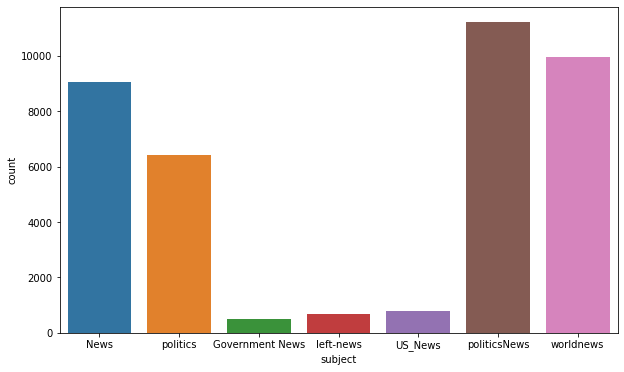

In [28]:
# spread of information sources/ subjects in raw df 

plt.figure(figsize=(10,6))
sns.countplot('subject', data = raw_df)
plt.show()

####  <span style="color:red">Added changes</span> in next cell

In [29]:
# number of samples grouped by subject
raw_df.groupby('subject')['true'].count()

subject
Government News      514
News                9050
US_News              783
left-news            683
politics            6423
politicsNews       11214
worldnews           9978
Name: true, dtype: int64

####  <span style="color:red">Added changes</span> in next 2 cells

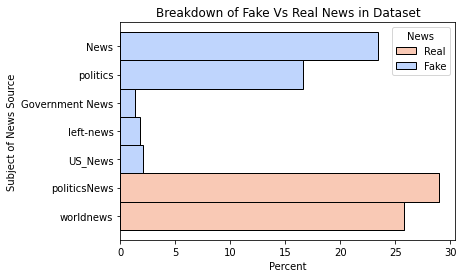

In [30]:
# plot the grouped with seaborn and matplotlib
sns.histplot(raw_df, y='subject', hue ='true', 
             stat = 'percent', multiple = 'stack',
             palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')
plt.legend(title='News', loc='upper right', labels = ['Real', 'Fake'])

#### Let's change politicsNews to politics, News to worldnews and plot again
#### This allows easier comparison of news subject for fake and real news 

####  <span style="color:red">Added changes</span> in next 2 cells

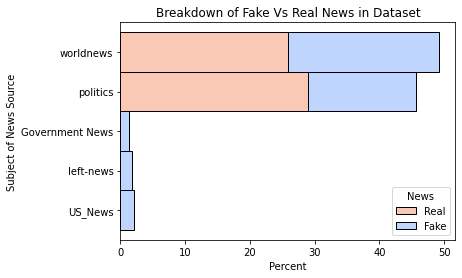

In [31]:
raw_df['subject'].replace({'politicsNews':'politics', 
                           'News':'worldnews'}, inplace = True)

sns.histplot(raw_df, y='subject', hue ='true', 
           stat = 'percent', multiple = 'stack',
           palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')
plt.legend(title='News', loc='lower right', labels = ['Real', 'Fake'])

#### Let's make a word cloud of the text for quick comparison of article content before cleaning and processing. 


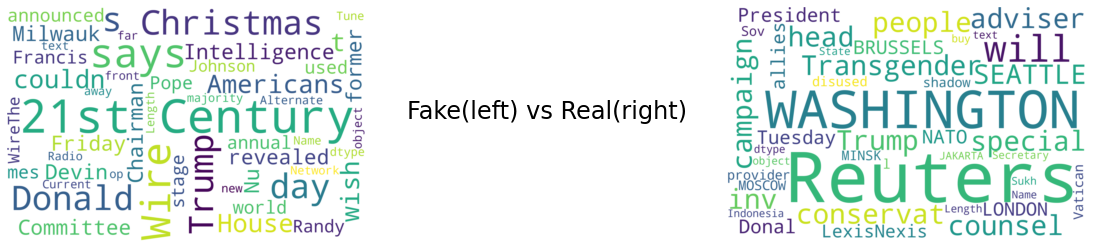

In [32]:
fake_text = raw_df.text[raw_df['true']==0]
real_text = raw_df.text[raw_df['true']==1]

def plot_fake_vs_real(fake, real):
    wordcloud_fake = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(fake))
    wordcloud_real = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(real))
    
    # plot WordCloud img 
    plt.subplots(figsize=(15,6))
    
    plt.subplot(1,3,1)
    plt.imshow(wordcloud_fake, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.suptitle("Fake(left) vs Real(right)", y=0.5, va='center', size = 24)
    
    plt.subplot(1,3,3)
    plt.imshow(wordcloud_real, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    
plot_fake_vs_real(fake_text, real_text)
plt.show()      

#### Let's add a wordcloud of title words too, to show what words are used as click / read-bait

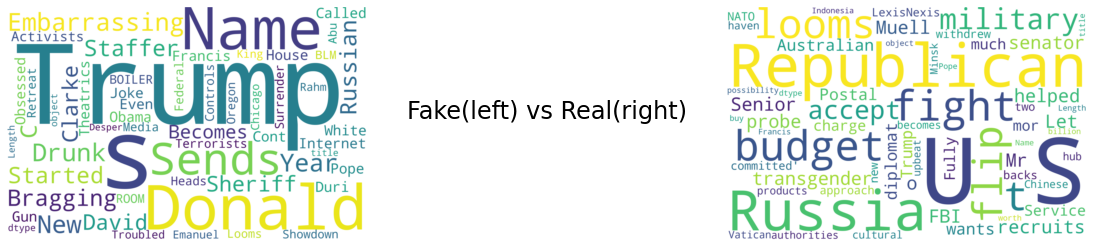

In [33]:
fake_title = raw_df.title[raw_df['true']==0]
real_title = raw_df.title[raw_df['true']==1]

plot_fake_vs_real(fake_title, real_title)
plt.show()

## Data Cleaning 

####  <span style="color:red">Added changes</span> in next  cell

Df needs cleaning. Ultimate Goal is:  
* Check for null values
* check for empty spaces 
* check for nonsense texts 
* remove urls, https, special characters, numbers 
* remove REUTERS()


In [34]:
# check raw_df starting point
raw_df.shape

(38645, 5)

In [35]:
# check null values
raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
dtype: int64

####  <span style="color:red">Added changes</span> in next 3 cells

In [36]:
# # drop missing values

# raw_df = raw_df.dropna()
# raw_df.shape

# # Note, dropna() not picking up null values as still some text missing in DF. 

#### Below is initial code for removing publisher info (reuters), but since it uses '-' to seperate, it may target necessary hyphens in texts. Left out for more favourable option below 

In [37]:
# Initial code for removing publisher info. 
""" # Make [index] for rows that don't have publication info (REUTERS)
# note: not all - are reuters, and may be in actual text


no_publisher = []
for index, row in enumerate(raw_df.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        
        # if no text present, this should raise error 
        record[1]
        assert(len(record[0]) < 260)
    except:
        no_publisher.append(index)
        

# check for the 'clean' data, that doesn't start with REUTERS
# note 23445 records

raw_df.iloc[no_publisher].text


# create list of indexes for rows that have publication info (REUTERS)
# this will seperate the text from the publisher info (i.e seperate REUTERS())

publisher = []
pt_text=[]

for index, row in enumerate(raw_df.text.values):
    if index in no_publisher: 
        
#         if no publisher mentioned, add unknown
        pt_text.append(row)
        publisher.append("Unknown")
        continue 
        
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    pt_text.append(record[1])
    

# replace current text column with the new one made above 
# add new seperate column for publisher info (i.e REUTERS())

raw_df["publisher"] = publisher 
raw_df["text"] = pt_text

del publisher, pt_text, record, no_publisher

""" 

' # Make [index] for rows that don\'t have publication info (REUTERS)\n# note: not all - are reuters, and may be in actual text\n\n\nno_publisher = []\nfor index, row in enumerate(raw_df.text.values):\n    try:\n        record = row.split(" -", maxsplit=1)\n        \n        # if no text present, this should raise error \n        record[1]\n        assert(len(record[0]) < 260)\n    except:\n        no_publisher.append(index)\n        \n\n# check for the \'clean\' data, that doesn\'t start with REUTERS\n# note 23445 records\n\nraw_df.iloc[no_publisher].text\n\n\n# create list of indexes for rows that have publication info (REUTERS)\n# this will seperate the text from the publisher info (i.e seperate REUTERS())\n\npublisher = []\npt_text=[]\n\nfor index, row in enumerate(raw_df.text.values):\n    if index in no_publisher: \n        \n#         if no publisher mentioned, add unknown\n        pt_text.append(row)\n        publisher.append("Unknown")\n        continue \n        \n    record 

In [38]:
# how many have <CITY>(Reuters) pattern in text 
# pattern = 0+ uppercase letters, 0 or 1 spaces, (Reuters)

pattern = r'[A-Z]* ?\(Reuters\)'

test_df = raw_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

result = f"{test_df.groupby('patterns')['text'].count()[1]} of {raw_df.shape[0]} samples have <City> (REUTERS) pattern."
print(colored(result, 'blue', attrs=['bold']))

21028 of 38645 samples have <City> (REUTERS) pattern.


In [39]:
# remove pattern <CITY> (Reuters)

raw_df['text'] = raw_df['text'].map(lambda x: re.sub(pattern, '', x))

####  <span style="color:red">Added changes</span> in next 5 cells

In [40]:
raw_df.sample(10)

,title,text,subject,date,true
24818,Melania's Slovenian hometown eyes Trump win as...,"SEVNICA, Slovenia - The small Slovenian town o...",politics,"November 9, 2016",1
12095,DEAR DEMOCRATS AND LIBERALS…Stop Complaining A...,Ouch!,politics,"Nov 21, 2016",0
5699,Democrats Spend Big On This Ad To Expose Trum...,The Democratic super PAC Priorities USA is spe...,worldnews,"June 27, 2016",0
34150,France's Macron says Raqqa fall not end of bat...,- President Emmanuel Macron said on Friday th...,worldnews,"October 20, 2017",1
18399,"Allegations of Russian meddling in U.S., Europ...",- Allegations of Russian meddling in election...,politics,"October 31, 2017",1
34969,"Illinois man charged with kidnapping, death of...",- An Illinois man accused of abducting a Chin...,worldnews,"October 11, 2017",1
32287,"Israel signals free hand in Syria as U.S., Rus...",- Israel signaled on Sunday that it would kee...,worldnews,"November 12, 2017",1
25368,Clinton says Trump may have violated U.S. law ...,- U.S. Democratic presidential nominee Hillar...,politics,"September 29, 2016",1
2974,Trump Brags About Number Of People Coming To ...,"With just three days until Inauguration Day, D...",worldnews,"January 17, 2017",0
14408,BREAKING: VIDEO RELEASED Of Angry Leftist Mob ...,If this had been a Tea Party group attacking N...,politics,"Dec 14, 2015",0


In [41]:
# raw_df.head(6)

In [42]:
# raw_df.tail(6)

In [43]:
# raw_df.describe(include=[np.object])

In [44]:
# raw_df.describe(include=[np.number])

In [45]:
raw_df.describe(include='all')

,title,text,subject,date,true
count,38645,38645,38645,38645,38645.000000
unique,38268,38644,5,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,worldnews,"December 6, 2017",NaN
freq,14,2,19028,166,NaN
mean,NaN,NaN,NaN,NaN,0.548376
std,NaN,NaN,NaN,NaN,0.497661
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [46]:
# Check for empty rows 

raw_df[raw_df['text'].str.strip()=='']

,title,text,subject,date,true
10920,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
26373,Graphic: Supreme Court roundup,,politics,"June 16, 2016",1


In [47]:
# drop the above empty rows 

raw_df = raw_df[raw_df['text'].str.strip()!='']
raw_df.shape

(38643, 5)

####  <span style="color:red">Added changes</span> in next 2 cells

### Run below just to double check no empty once more 

In [48]:
# # check for empty rows and list them
# #  note 631 empty values 

# empty = [index for index, text in enumerate(raw_df.text.values) if str(text).strip()=='']
# print(f"Number of empty rows: {len(empty)}")
# raw_df.iloc[empty].tail()

#### Confirm dropped unecessary rows. 

####  <span style="color:red">Added changes</span> in next cell

In [49]:
# text has bool true so should return false if empty 
# just another way to check for null values 
# note DF length matches above with 38644 rows

all(raw_df['text'].astype(bool))

True

### Expand into day, month, year

In [50]:
# date -> datetime

def get_day_mon_yr(date):
    try: 
        return pd.to_datetime(date, infer_datetime_format = True)
    except:
        return np.nan
    
raw_df['Date'] = raw_df.apply(lambda row: get_day_mon_yr(row['date']), axis = 1)
raw_df.sample(5)

,title,text,subject,date,true,Date
15031,YOU WON’T BELIEVE WHO DEFEATED A BILL IN JUNE ...,Even though he s a RINO THIS is a shocker! In ...,politics,"Jul 25, 2015",0,2015-07-25
35456,Ready to fight again: The homeless Rohingya st...,"COX S BAZAR, Bangladesh - For 28-year-old Rohi...",worldnews,"October 5, 2017",1,2017-10-05
19680,Trump attacks Mitch McConnell for second day o...,"BEDMINSTER, N.J. - President Donald Trump atta...",politics,"August 10, 2017",1,2017-08-10
31030,Merkel presses cautious SPD over joining new G...,- Chancellor Angela Merkel piled pressure on ...,worldnews,"November 27, 2017",1,2017-11-27
12811,HOLLYWOOD LIBS Raise Big Money For #CrookedHil...,The Democratic presidential nominee is in the...,politics,"Aug 23, 2016",0,2016-08-23


In [51]:
# check null values (none expected)

raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
Date       6
dtype: int64

In [52]:
# check where Date is NaN

raw_df[raw_df['Date'].isna()]

,title,text,subject,date,true,Date
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0,NaT
15119,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0,NaT
15120,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0,NaT
15422,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
15423,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
16126,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0,NaT


In [53]:
raw_df.shape

(38643, 6)

In [54]:
# drop the NaN values 

raw_df.dropna(inplace=True)
print(raw_df.shape)
raw_df.sample(5)

(38637, 6)


,title,text,subject,date,true,Date
13885,RUSH LIMBAUGH Warns Who The GOP Will Choose If...,Wow! Just wow!,politics,"Mar 17, 2016",0,2016-03-17
21087,Supreme Court tosses Republican-drawn North Ca...,- The U.S. Supreme Court on Monday ruled that...,politics,"May 22, 2017",1,2017-05-22
9116,FLASHBACK: CNN HOST Concerned Working American...,CNN s Allyson Camerota expressed her concern a...,politics,"Dec 26, 2017",0,2017-12-26
18423,First charges filed in U.S. special counsel's ...,- A federal grand jury on Friday approved the...,politics,"October 28, 2017",1,2017-10-28
38345,Vote ruling by chief justice surprises Kenyans...,- Kenya s Supreme Court ruling to scrap last ...,worldnews,"September 3, 2017",1,2017-09-03


####  <span style="color:red">Added changes</span> in next cell

In [55]:
# # check where date is NOT NaN
# # note: matches df shape above 

# raw_df[raw_df['Date'].notna()]

In [56]:
# Add cols for day, month, year 

raw_df['day']= raw_df.apply(lambda row: row['Date'].day, axis=1)
raw_df['month']= raw_df.apply(lambda row: row['Date'].month, axis =1)
raw_df['year']= raw_df.apply(lambda row: row['Date'].year, axis = 1)

# drop redundant date cols
raw_df.drop(['date','Date'], axis=1, inplace=True)
raw_df.sample(3)

,title,text,subject,true,day,month,year
5945,‘Racist’ And ‘Reprehensible’: How Joe Biden Ju...,Vice President Joe Biden followed up Senator E...,worldnews,0,9,6,2016
21268,Comey had pushed for more resources for Russia...,"- FBI Director James Comey, days before Presi...",politics,1,10,5,2017
35168,Factbox: Japan main parties' key election pled...,- Campaigning began on Tuesday in an election...,worldnews,1,10,10,2017


#### Let's plot the correlation between date and target 

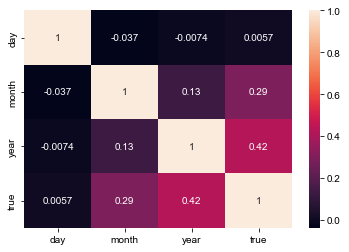

In [57]:
sns.heatmap(raw_df[['day', 'month', 'year', 'true']].corr(), annot=True)
sns.set(rc={'figure.figsize':(10,6)})

### Unique chars in text 

#### Let's plot the length of unique characters in the text, and 'true-value'

In [58]:
# count unique alphabet characters in text of each article 

def unique_char_num(string): 
    lower_str = string.lower()
    alpha = re.sub(r'[^a-z]','',lower_str)
    unique_ch = set(list(alpha))
    n_unique_ch = len(unique_ch)
    return n_unique_ch 

temp_df = raw_df[['text', 'true']].copy()
temp_df['unique_char'] = temp_df.text.map(lambda x: unique_char_num(x))
temp_df.head()

,text,true,unique_char
0,Donald Trump just couldn t wish all Americans ...,0,25
1,House Intelligence Committee Chairman Devin Nu...,0,24
2,"On Friday, it was revealed that former Milwauk...",0,25
3,"On Christmas day, Donald Trump announced that ...",0,26
4,Pope Francis used his annual Christmas Day mes...,0,25


In [59]:
# sort into descending order by unique_char

to_plot = temp_df.sort_values(by='unique_char', ascending=False).reset_index()

# add text length col to DF 
to_plot['text_len']= to_plot.text.map(lambda x: len(x))
to_plot

,index,text,true,unique_char,text_len
0,19325,- The workforce at the U.S. Environmental Pr...,1,26,1935
1,10289,Lt. Col. Tony Shaffer opened a can of worms to...,0,26,8452
2,10277,"So what s worse, Barack Obama remaining silent...",0,26,4594
3,29460,- Lebanon has set a date of May 6 next year t...,1,26,2135
4,29459,- Australia should introduce a law forcing re...,1,26,3962
...,...,...,...,...,...
38632,11845,Via: WT,0,5,7
38633,11890,Enjoy,0,5,5
38634,12405,Via: GP,0,5,7
38635,11113,Enjoy:,0,5,6


<AxesSubplot:xlabel='text_len', ylabel='unique_char'>

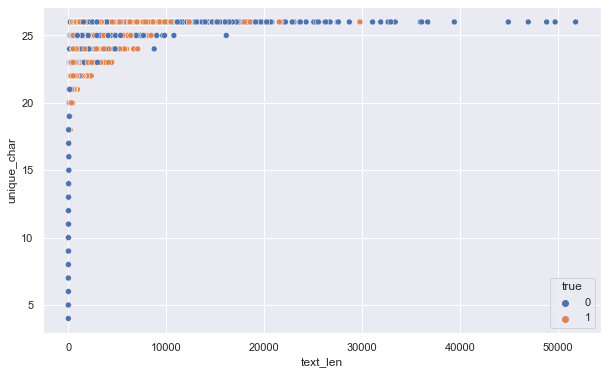

In [60]:
sns.scatterplot(data=to_plot, x='text_len', 
                y='unique_char', hue='true')  

####  <span style="color:red">Added changes</span> in next cell

In [61]:
# This took a long time to exe. will look for laternative faster code 

line1= f"{to_plot[to_plot['unique_char']<20].count()[0]} articles used less than 20 unique characters in their text"
line2= f"{to_plot.text_len[to_plot['unique_char']<20].max()} is the longest piece of text that had less than 20 unique characters"
line3= f"{to_plot.text_len[to_plot['unique_char']>=20].mean().astype(int)} is the average length of the text, where the article had 20 or more unique characters"

print(colored(line1, 'green', attrs=['bold']))
print(colored(line2, 'blue', attrs=['bold']))
print(colored(line3, 'red', attrs=['bold']))

277 articles used less than 20 unique characters in their text
284 is the longest piece of text that had less than 20 unique characters
2464 is the average length of the text, where the article had 20 or more unique characters


In [62]:
raw_df.sample(3)

,title,text,subject,true,day,month,year
15427,EGYPTIAN COURT SENTENCES MUSLIM BROTHERHOOD LE...,But wait wasn t the Muslim Brotherhood s Arab ...,politics,0,11,4,2015
12666,ANTI-GUN Zealot KATIE COURIC Hit With $12 MILL...,Little Miss Sunshine has fooled a lot of peo...,politics,0,13,9,2016
31502,30 people killed in attack on cattle herders i...,"BAUCHI, Nigeria - Unidentified attackers kille...",worldnews,1,21,11,2017


####  <span style="color:red">Added changes</span> in next 2 cells

#### Remove HTML

In [ ]:
# # HTML removal 
# def remove_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()

In [63]:
# Function to remove HTML tags
def remove_tags(text):
  
    # parse html content
    soup = BeautifulSoup(text, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [ ]:
# # Test

# test =  """
#           <html>
#             <head>
#                 <title> Geeksforgeeks </title>
#                 <style>.call {background-color:black;} </style>
#                 <script>getit</script>
#             </head>
#             <body>
#                 is a
#                 <div>Computer Science portal.</div>
#             </body>
#           </html>
#         """
# print(remove_html(test))
# print(remove_tags(test))

In [64]:
raw_df['text'] = raw_df['text'].map(lambda x: remove_tags(x))

#### Remove all special characters and numbers, fold text to lowercase

In [65]:
# casefold
raw_df['text'] = raw_df['text'].map(lambda x: x.casefold())

In [66]:
def remove_punctuation_spec_char(text_):
    punctuation = string.punctuation
    text_ = ' '.join([word for word in text_.split() if word not in punctuation])
    text_ = ' '.join([re.sub(r'[^a-zA-Z]','',word) for word in text_.split()])
    return text_

raw_df['text'] = raw_df['text'].map(lambda x: remove_punctuation_spec_char(x))

In [67]:
raw_df.sample(3)

,title,text,subject,true,day,month,year
30875,Merkel says must stick to growth-friendly inve...,german chancellor angela merkel currently tryi...,worldnews,1,29,11,2017
12634,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION ...,you have got to be kidding me after all the ti...,politics,0,17,9,2016
9391,NFL ON LIFE SUPPORT? Pictures Of Empty Stadium...,since the colin kaepernick and his fellow play...,politics,0,19,11,2017


####  <span style="color:red">Added changes</span> in next 2 cells

## Save cleaned dataframe

In [68]:
cleaned_df = raw_df[['text', 'true']].copy()
cleaned_df.to_csv('data/cleaned_news.csv', encoding='utf-8')

### <span style="color:blue">Stoped here and created new notebook for Preprocessing (includs removing stopwords, lemmatize (using position of speech as dop argument), vectorizing)</span>
### <span style="color:blue">And the third notebook will create for ML</span>

## Show distribution of text count for each category as well?

### Let's finish cleaning up the DF and Preprocessing 

Delete unecessary cols - day, month, year, subject, title 
They won't be needed going forwards


####  <span style="color:red">Added changes</span> in next 2 cells

In [ ]:
# cleaned_df.head(3)

In [ ]:
# del cleaned_df['year']
# del cleaned_df['month']
# del cleaned_df['day']
# del cleaned_df['subject']
# del cleaned_df['title']


# cleaned_df.head(10)

#### Let's really clean up the data

* Remove punctuation
* remove special char 
* convert upper to lower 
* remove stopwords
* remove urls
* Lemmatization - The stemming of words without loss of meaning to context


##### We'll clean the first 10 news article only for now... 

In [ ]:
text_1 = cleaned_df.text[10]
text_1


In [ ]:
#  use contractions lib for context when expanding contractions (i'd -> i would)
import contractions 

In [ ]:
# contractions now working after comnverting to str 

text_1 = ' '.join([contractions.fix(word) for word in text_1.split()])
text_1



In [ ]:
#  remove stopwords 
#  is stopword library inclusive enough? 


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text_1 = word_tokenize(text_1) 
text_1 = [ word for word in text_1 if not word in set(stopwords.words("english"))]


In [ ]:
text_1 = ' '.join(text_1)
text_1

In [ ]:
# Remove special characters and punctuation 
import re 
import string 

text_1 = re.sub('\[[^]]*\]', ' ', text_1)
text_1 = re.sub('[^a-zA-Z]', ' ', text_1)

#  convert from  upper to lower 
text_1 = text_1.lower()

text_1

In [ ]:
#  removal of HTML content

from bs4 import BeautifulSoup

soup = BeautifulSoup(text_1, "html.parser")
text_1 = soup.get_text()
text_1

In [ ]:
# Lemmatization 

from nltk.stem.wordnet import WordNetLemmatizer

lemma = WordNetLemmatizer()
text_1 = [lemma.lemmatize(word) for word in text_1.split()]

text_1 = " ".join(text_1)
text_1

* perhaps remove numbers? 
* what about exclamation and question marks? 

### Now lets use the tested cleansing above and make functions to  cleanse all text. add a few more functions

In [ ]:
# remove URL
def remove_URL(text):
    url = re.compile(r'https?://\S+')
    return url.sub(r' httpsmark ', text)

# HTML removal 
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


# Remove punctuation
def remove_punct(text):
    return re.sub('\[[^]]*\]', '', text)

# remove special chars
def remove_chars(text):
    return re.sub("[^a-zA-A]", " ", text)

# remove emoji 
""" def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' emoji ', string)
""" 

# remove stopwords
def remove_stop_and_lemmat(text): 
    final_text = []
    text = text.lower()
    text = word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    return " ".join(final_text)


# full function 
def cleanse(text):
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_punct(text)
    text = remove_chars(text)
    # text = remove_emoji(text)
    text = remove_stop_and_lemmat(text)
    


In [ ]:
# Apply function to text col
# Note: haven't tested this as took too long to run. Suspect it maybe remove_emoji()

cleaned_df['text']=cleaned_df['text'].apply(cleanse)

In [ ]:
cleaned_df.head()

# current output shows before cleanse function

In [ ]:
cleaned_df.tail(15)

#current output is before cleanse function

# Haven't tested any function post this due to time. will confirm function 

#### Let's make a new wordcloud using the cleaned data 

In [ ]:
# STOPWORDS =set(nltk.corpus.stopwords.words("english")).generate(text)

plt.figure(figsize = (10,6))
wc = WordCloud(width = 440, 
               height = 200, 
               stopwords =set(nltk.corpus.stopwords.words("english")).generate(" ".join(cleaned_df['text']))
plt.imshow(wc, interpolation = 'bilinear')

### N-Gram Analysis

#### Let's see the popular words and word combinations in the text articles 
#### N-grams are sequences of words or symbols. n = number of sequences 
#### 1 sequence = unigram. 2 sequences = bigram, 3 sequences = trigram
#### unigram = most frequent word. bigram = most frequent pair of words... 



In [ ]:
# text used is from cleaned data. 
# copy text, then declare string so we can use it in function 

texts = ' '.join(cleaned_df)
string = texts.split(" ")

In [ ]:
# string = string dtype. i = num of variables who's sequence we want
# declare n-gram as df from nltk.ngram() and group by highest count 
# limited to 20 top results 
# rename df columns to plot diagram 

def draw_n-gram(string, i): 
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:20]
    n_gram_df = pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.rest_index()
    n_gram_df = g_gram_df.rename(columns={'index':'word',0: 'count'})
    
    print(n_gram_df.head())
    
    plt.figure(figsize(15,8))
    return sns.barplot(x='count', y='word',
                      data=n_gram_df, pallete='coolwarm')


In [ ]:
# let's call the unigram analysis function we've created 
# the most popular words 
draw_n_gram(string, 1)

In [ ]:
# the most common pair of words 

draw_n_gram(string, 2)

In [ ]:
# the most common triage of words 

draw_n_gram(string, 3)

#### Save cleaned DF 

In [ ]:
final_df = cleaned_df[['text','true']].copy()
final_df.to_csv('fake_real_news_dataset.csv', index=False)
final_df.head()

## Group to do list:
* Sentiment analysis (Princess & Nicola)
* ML and Modelling (Rose, Janka & Victoria)
* Create Presentations (Nicola) 
* Write Project Report 
